In [78]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [71]:
# import dataset

path = r'Data\data_v2.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [72]:
df = df.drop('id', axis=1)

In [73]:
df.head()

,area,sex,age,antiquity,salary,state,chapter,seniority
0,CUSTOMER SUCCESS,FEMENINO,27.0,9.0,4000000,active,EXPERIENCIA_USUARIO,ADVANCED
1,CUSTOMER SUCCESS,FEMENINO,43.0,57.0,33000000,active,HEAD,MASTER
2,CUSTOMER SUCCESS,MASCULINO,24.0,0.0,2050000,retired,BACKEND,TRAINEE
3,CUSTOMER SUCCESS,MASCULINO,25.0,21.0,5500000,active,BACKEND,ADVANCED
4,CUSTOMER SUCCESS,FEMENINO,31.0,93.0,3406000,active,CALIDAD DE SOFTWARE,ADVANCED


In [76]:
df  =df.drop(['area', 'chapter'], axis=1)
df.head()

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,27.0,9.0,4000000,active,ADVANCED
1,FEMENINO,43.0,57.0,33000000,active,MASTER
2,MASCULINO,24.0,0.0,2050000,retired,TRAINEE
3,MASCULINO,25.0,21.0,5500000,active,ADVANCED
4,FEMENINO,31.0,93.0,3406000,active,ADVANCED


<AxesSubplot:xlabel='salary', ylabel='Count'>

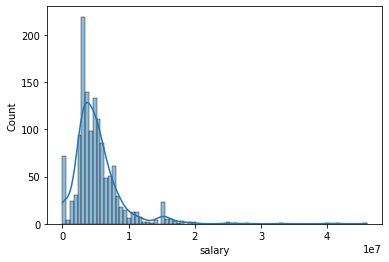

In [82]:
sns.histplot(df['salary'],  kde=True)

In [79]:
scaler = StandardScaler()

20.833333333333332